In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

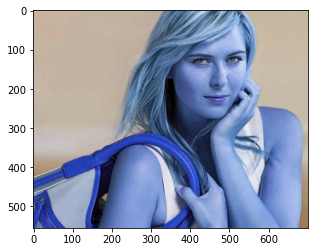

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

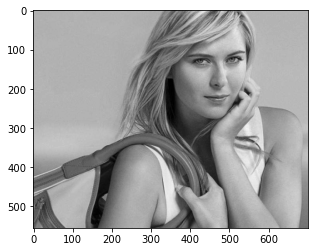

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces # array of faces, with x,y,w,h

array([[352,  38, 233, 233]], dtype=int32)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

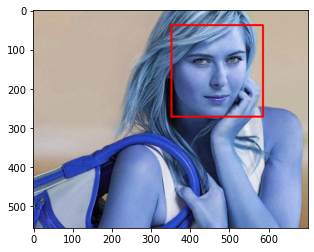

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

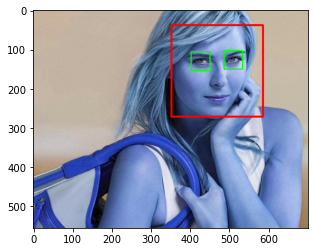

In [15]:
cv2.destroyAllWindows()
# for each face, detect eyes
for (x,y,w,h) in faces: 
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

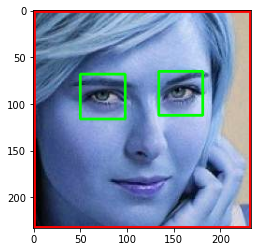

In [16]:
plt.imshow(roi_color, cmap='gray')

In [17]:
#function to return cropped faces from an image
#returns nothing if no 2 eyes
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

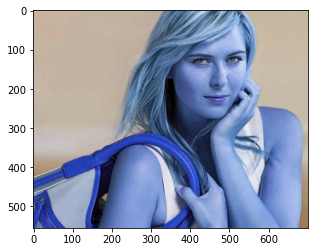

In [18]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

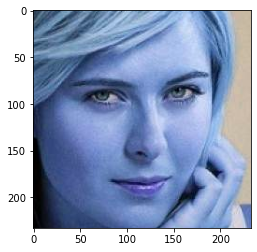

In [19]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

In [20]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/cropped',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [31]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    if celebrity_name == 'cropped':
        continue
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        print(entry.path)
        last = entry.path.split('/')[-1]
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None and last != '.DS_Store' :
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

maria_sharapova
./dataset/maria_sharapova/unnamed (2).jpg
./dataset/maria_sharapova/002831aab808e5488d75de92ec4fb939.jpg
./dataset/maria_sharapova/monochrome-maria-sharapova-face-wallpaper-65016-67225-hd-wallpapers.jpg
./dataset/maria_sharapova/Sharapova_at_the_Mutua_Madrid_Open_2015.jpg
./dataset/maria_sharapova/12009b578d60268f36fcd7f2dcf7a04d.jpg
./dataset/maria_sharapova/DmWCxE.jpg
./dataset/maria_sharapova/2015070814363485712044768374.jpg
./dataset/maria_sharapova/Maria-Sharapova-women-singles-event-US-Open-2006.jpg
./dataset/maria_sharapova/maria-sharapova-tim-ferriss-interview_s.webp
./dataset/maria_sharapova/TELEMMGLPICT000226075870_trans_NvBQzQNjv4BqP4pV-m6laGcMQMbuKYgJGTgvk-t9w27mDp57ATZVrwg.webp
./dataset/maria_sharapova/maria-sharapova-praises-roger-federer-for-his-offcourt-life.jpg
./dataset/maria_sharapova/2-70.jpg
./dataset/maria_sharapova/Maria_Sharapova_women-169589.jpg
./dataset/maria_sharapova/maria-sharapova-australian-open.jpg
./dataset/maria_sharapova/Grigor-Dimit

./dataset/virat_kohli/088db66e0b.jpg
./dataset/virat_kohli/ee9b8b6b6b.jpg
./dataset/virat_kohli/6adbc1218c.jpg
./dataset/virat_kohli/9e308996ca.jpg
./dataset/virat_kohli/9bb09002ef.jpg
./dataset/virat_kohli/1146943f73.jpg
./dataset/virat_kohli/3e6d62bc8e.jpg
./dataset/virat_kohli/71ed3d75ae.jpg
./dataset/virat_kohli/37d3f53e84.jpg
./dataset/virat_kohli/0b53cce8c6.jpg
./dataset/virat_kohli/bb41267a29.jpg
./dataset/virat_kohli/a18f264208.jpg
./dataset/virat_kohli/d3b3c15c31.jpg
./dataset/virat_kohli/ce8509c4a3.jpg
./dataset/virat_kohli/5a3384f779.jpg
./dataset/virat_kohli/7fde5779f6.jpg
./dataset/virat_kohli/83cf04fd82.jpg
./dataset/virat_kohli/266f9eacf3.jpg
./dataset/virat_kohli/49f7355f97.jpg
./dataset/virat_kohli/924c3e8a40.jpg
./dataset/virat_kohli/f4f9df9fcc.jpg
./dataset/virat_kohli/4cbef36ff6.jpg
./dataset/virat_kohli/2018439965.jpg
./dataset/virat_kohli/7e224dbc5c.jpg
./dataset/virat_kohli/631e46db26.jpg
lionel_messi
./dataset/lionel_messi/IMG_20200131_151915.jpg
./dataset/lione

./dataset/serena_williams/images (1).jfif
./dataset/serena_williams/serena-williams-competition.jpg
./dataset/serena_williams/rs_634x1024-171117181513-634.serena-williams-alexis-ohanian-wedding.ct.111717.jpg
./dataset/serena_williams/TELEMMGLPICT000208363706_trans++MG9jYnib85FJIfCc-bQYcTFCz-CXoLiAuLtBSY0KYYg.jpeg
./dataset/serena_williams/GettyImages-1146432042.jpg
./dataset/serena_williams/dedeeb4268d54d1675933ff939740907.jpg
./dataset/serena_williams/180529_gma_digital_serena_hpMain_16x9_992.jpg
roger_federer
./dataset/roger_federer/Roger_Federer_wikimedia_cc.jpg
./dataset/roger_federer/shPDTYko91c.jpg
./dataset/roger_federer/bill-gates-playing-alongside-roger-federer-is-always-a-thrill.jpg
./dataset/roger_federer/ed9602a9fb1ed29e817aa5cf91bd1fe7 (1).jpg
./dataset/roger_federer/51f465e41dbadc549abdd64ba7ee166d.jpg
./dataset/roger_federer/Roger-Federer-wife-Mirka-Federer-1009792-1280x720.jpg
./dataset/roger_federer/GettyImages-1161653186.jpg
./dataset/roger_federer/833491-jzwrfgakxz-1

error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-iwig8vc6/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
